# 1. Import Necessary Libraries





In [47]:
#import mean libarary
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D,Dense ,Flatten ,InputLayer , BatchNormalization ,Dropout
from keras.callbacks import EarlyStopping
from skimage.transform import resize

# 2. Load & Preprocessing Datasets

In [48]:
#donlowd cifar_10 datasets
(x_train,y_train), (x_test, y_test) = cifar10.load_data()


In [49]:
#print shapeX_train,Y_train,x_test, y_test
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [50]:
y_train[0]

array([6], dtype=uint8)

In [51]:
#convert the category label into one hot encoding
from tensorflow import keras
num_classes = 10
y_train_encoder=keras.utils.to_categorical(y_train, num_classes)
y_test_encoder=keras.utils.to_categorical(y_test, num_classes)

In [52]:
y_train_encoder.shape ,y_test_encoder.shape

((50000, 10), (10000, 10))

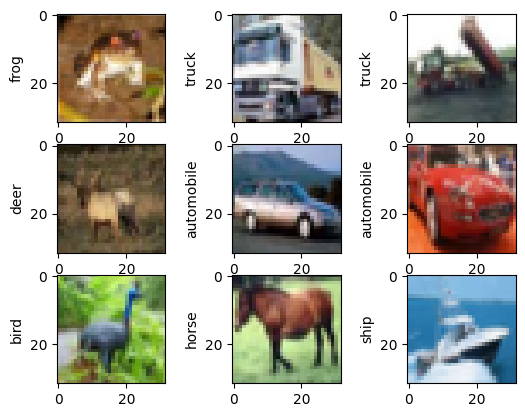

In [53]:
#creat a image tag list
category_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
                 6:'frog',7:'horse',8:'ship',9:'truck'}
#show the first 9 image and their labels
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.ylabel(category_dict[y_train[i][0]])
plt.show()

# 3. Design Network

In [54]:
from keras.src.layers.pooling.max_pooling2d import MaxPool2D
from tensorflow.keras.regularizers import l2

model=Sequential([
    #feature extraxtion
    Conv2D(128,7,input_shape=(32, 32, 3)),
    #summarization featur
    MaxPool2D(pool_size=2),
    #standerdization
    BatchNormalization(),

    Conv2D(64,3),
    MaxPool2D(pool_size=2),
    BatchNormalization(),

    Conv2D(32,3),
    MaxPool2D(pool_size=2),
    BatchNormalization(),
    #flatting
    Flatten(),
    #training (hidden layer)
    Dense(512,activation='relu',kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(124, activation='relu',kernel_regularizer=l2(0.01)),
    #output layer
    Dense(10,activation='softmax',)

])

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 128)       18944     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_15 (Ba  (None, 13, 13, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                      

## 3.1 Compile & Fit Model

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [57]:
history = model.fit(x_train,y_train_encoder,validation_data=(x_test,y_test_encoder),batch_size=32,epochs=100,
                    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 50)])

Epoch 1/100
1563/1563 [==============================] - 14s 7ms/step - loss: 2.0528 - accuracy: 0.3628 - val_loss: 2.0047 - val_accuracy: 0.3273
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6034 - accuracy: 0.4543 - val_loss: 1.8021 - val_accuracy: 0.3955
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4897 - accuracy: 0.4962 - val_loss: 1.9915 - val_accuracy: 0.3775
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4201 - accuracy: 0.5244 - val_loss: 1.6027 - val_accuracy: 0.4670
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3683 - accuracy: 0.5411 - val_loss: 1.7773 - val_accuracy: 0.4296
Epoch 6/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3212 - accuracy: 0.5576 - val_loss: 1.3995 - val_accuracy: 0.5299
Epoch 7/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2806 - accuracy: 0.5759 - val_loss: 1.9546 -

### 3.2 Visualization History

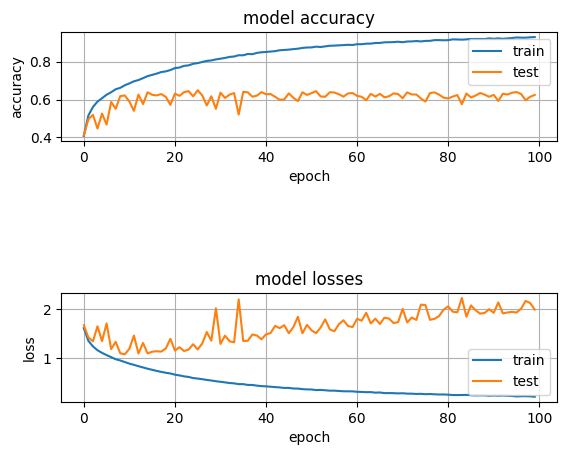

In [ ]:
fig = plt.figure()
plt.subplot(3,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

plt.subplot(3,1,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

## 3.3 Evaluate Model

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred=y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix


# Assuming y_pred is one-hot encoded
y_test_class_indices = np.argmax(y_test_encoder, axis=-1)
conf_matrix = confusion_matrix(y_test_class_indices, y_pred)

# Continue with your code
print('confusion matrix: \n{0}'.format(conf_matrix))

confusion matrix: 
[[619  27  46  33  36  29  11  22 122  55]
 [ 41 668  27  27   8  34  10   7  42 136]
 [ 60   4 471  80  95 149  54  47  26  14]
 [ 11   6  58 448  77 260  52  45  18  25]
 [ 13   4  56  90 572 107  26  94  23  15]
 [ 11   2  61 121  45 676  20  54   4   6]
 [  5   9  54  87  71  63 673  15   9  14]
 [ 14   4  26  53  74 136   6 659   4  24]
 [ 72  28  20  21  19  29   6  10 720  75]
 [ 29  69  24  22   9  26   9  23  52 737]]


In [ ]:
def plot_confusion_matrix(matrix):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(matrix)
  fig.colorbar(cax)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

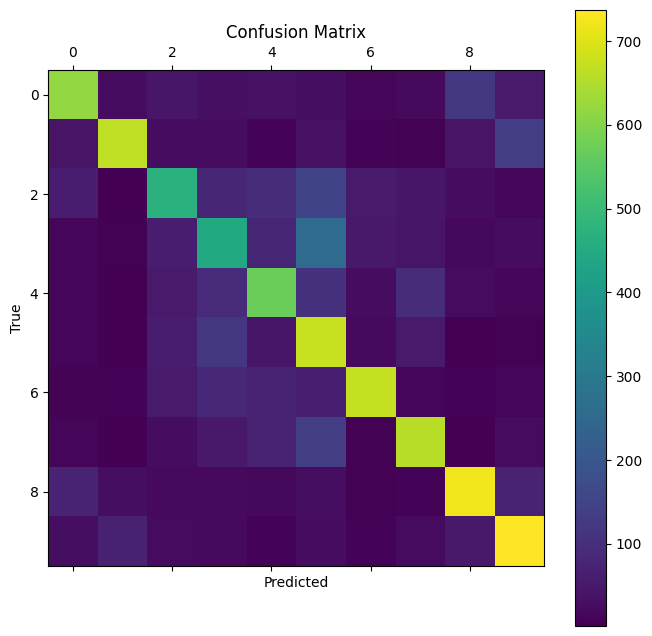

In [ ]:
plot_confusion_matrix(conf_matrix)


# 4. VGG16 Model


In [58]:
#import VGG16
from tensorflow.keras.applications import VGG16

In [ ]:
vgg_model=VGG16(
    include_top=False,
    input_shape=(32, 32, 3))

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

## 4.1 Design Model

In [ ]:
for layer in vgg_model.layers:
  layer.trainable = False

#we will have to use the functional API
#last layer out put
x=vgg_model.layers[6].output
x=Conv2D(32, kernel_size=3 ,activation='relu', input_shape=(32,32, 3))(x)
BatchNormalization()(x)
x=Conv2D(32, kernel_size=3 ,activation='relu')(x)
BatchNormalization()(x)

#Falatten as before
x = Flatten()(x)
x = Dense(1024 , activation='relu')(x)
x = Dense(512 , activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model
vgg_model_transfer=Model(inputs=vgg_model.input,outputs=x)

## 4.2 Compile & Fit Model

In [ ]:
#compile model
from keras.src.engine.training import optimizer
vgg_model_transfer.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
history = vgg_model_transfer.fit(x_train,y_train_encoder,validation_data=(x_test,y_test_encoder),batch_size=32,epochs=100,
                                    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 50)]
)

Epoch 1/100
1563/1563 [==============================] - 20s 11ms/step - loss: 1.5193 - accuracy: 0.5383 - val_loss: 1.1642 - val_accuracy: 0.6044
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1008 - accuracy: 0.6230 - val_loss: 1.1783 - val_accuracy: 0.6026
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0005 - accuracy: 0.6538 - val_loss: 1.1560 - val_accuracy: 0.6187
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9064 - accuracy: 0.6859 - val_loss: 1.1743 - val_accuracy: 0.6145
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8030 - accuracy: 0.7207 - val_loss: 1.1784 - val_accuracy: 0.6279
Epoch 6/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7112 - accuracy: 0.7536 - val_loss: 1.2684 - val_accuracy: 0.6189
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6186 - accuracy: 0.7842 - val_loss: 1

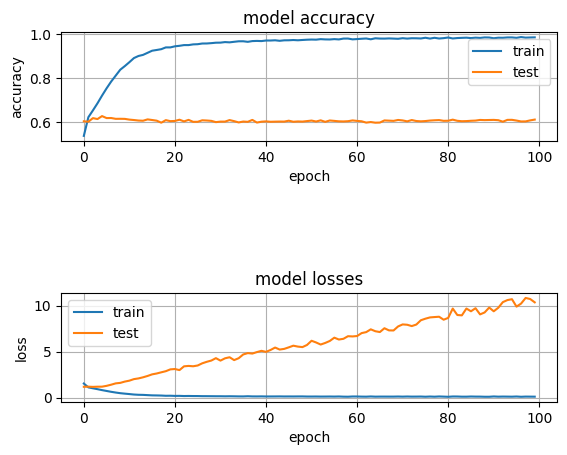

In [ ]:
fig = plt.figure()
plt.subplot(3,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

plt.subplot(3,1,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

In [ ]:
y_pred=vgg_model_transfer.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [ ]:
y_pred=y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix


# Assuming y_pred is one-hot encoded
y_test_class_indices = np.argmax(y_test_encoder, axis=-1)
conf_matrix = confusion_matrix(y_test_class_indices, y_pred)

# Continue with your code
print('confusion matrix: \n{0}'.format(conf_matrix))


confusion matrix: 
[[714  23  46  28  24   4  10  29  88  34]
 [ 29 679   8  46  12  12   7  15  55 137]
 [ 84   8 505  88  99  44  85  55  17  15]
 [ 34  28  53 491  53 125  94  59  25  38]
 [ 37   8  85  88 551  31  72  95  22  11]
 [ 15  12  66 197  58 498  54  72  15  13]
 [ 13  21  51 107  64  36 664  27   8   9]
 [ 22  14  40  51  99  39  10 663  24  38]
 [ 89  56  11  24  22   5   8  18 714  53]
 [ 34 127   5  40  28  16   5  35  68 642]]


In [ ]:
def plot_confusion_matrix(matrix):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(matrix)
  fig.colorbar(cax)


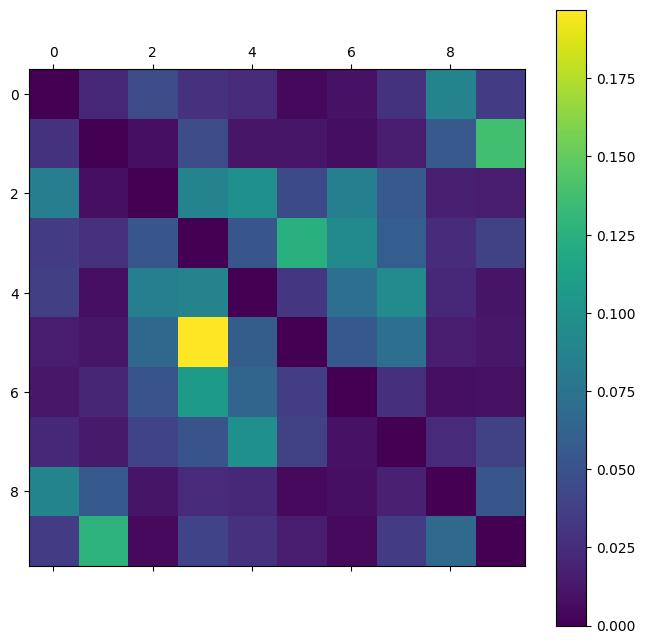

In [ ]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)
# plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_matrix)
#save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()